<a href="https://colab.research.google.com/github/sardarmonsoorsait/cnnproject_mnist/blob/master/cnnproject_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [ ]:

'''
87
88
89
# -*- coding: utf-8 -*-
"""CNN Project - Fashion-MNIST .ipynb
 
Automatically generated by Colaboratory.
 
Original file is located at
    https://colab.research.google.com/drive/1KrIrPLKKRwYobmqpacbf9eiQp5UC9Hhu
 
# Building CNN - Convolutional Neural Network
 
###Project Fashion-Classification - End to End 
 
Train Convolutional Neural Network on 60,000 Fashion-MNIST Images (data in NP array)
 
Test Convolutional Neural Network on 10,000 Fashion-MNIST Images (data in NP array)
 
## Import Libraries
"""
 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
import keras # to build Neural Network
 
"""## Load Data"""
 
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data() # load dataset from  keras
 
# Print shape of Data
 
X_train.shape, y_train.shape, "******", X_test.shape, y_test.shape
 
X_train[0] # image data in 2d numpy array shape 28x28 pixel
 
y_train[0] #9 => Ankle boot
 
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''
 
"""## Show image"""
 
plt.imshow(X_train[0], cmap='Greys')
 
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))
 
"""## Change Dimention"""
 
X_train.shape
 
X_train.ndim
 
# expected conv2d_input to have 4 dimensions, but got array with shape (28, 28, 1)
# so we have increase the dimention 3 to 4
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
 
# ref: https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html
 
X_train.ndim
 
"""## Feature Scaling"""
 
X_train = X_train/255
X_test = X_test/255
 
"""## Split Dataset"""
 
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)
 
X_train.shape,  y_train.shape, 
'''

#Load Dataset from Keras Datasets

In [6]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
X_train[12]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
y_train[12]

5

In [10]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

#Show the image corespond to the y value

Text(0.5, 1.0, 'Sandal')

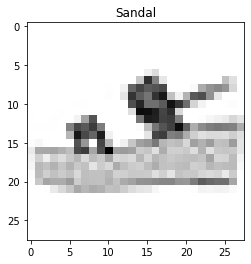

In [12]:
plt.imshow(X_train[12],cmap="Greys")
plt.title(class_labels[y_train[12]])

###show 10 images randomly with label name

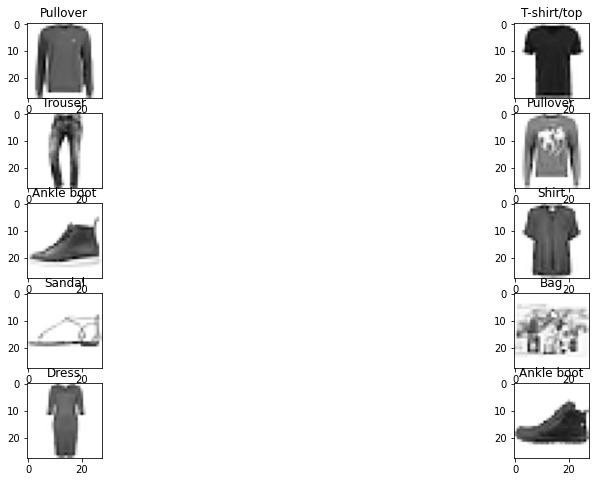

In [24]:
j=1
plt.figure(figsize=(16,8))
for i in np.random.randint(0,1000,10):
  plt.subplot(5,2,j)
  j+=1
 # plt.figure(figsize=(16,8))
  plt.imshow(X_train[i],cmap="Greys")
  plt.title(class_labels[y_train[i]])


In [25]:
X_train.ndim

3

conv2d needs 4 dimensions our data have 3 dimensions so we need to convert our data to 4 dimensions 

In [26]:
X_train = np.expand_dims(X_train,-1)

In [27]:
X_train.ndim

4

In [28]:
#Feature scaling
X_train = X_train/255
X_test = X_test/255

train test split

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2)
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))